In [17]:
import pandas as pd
import numpy as np
import pickle

In [2]:
series = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
#number of shifts
shiftno=4*24*14

In [4]:
df2=pd.DataFrame()
for _ in range(shiftno):
    df2 = pd.concat([df2,series.shift(periods=_)],axis=1)

In [5]:
yshiftno=4*24

In [6]:
#form y values
for _ in range(yshiftno):
    df2=pd.concat([df2,series.iloc[:,:].shift(periods=-1*_-1)],axis=1)

In [7]:
dataset = df2.iloc[shiftno-1:df2.shape[0]-yshiftno]

In [8]:
collist = []
for _ in range(int(len(dataset.iloc[:,series.shape[1]*shiftno:].columns)/2)):
    collist.extend(["realpower_"+str(_), "reactivepower_"+str(_)])

In [9]:
collist_input = []
for _ in range(int(len(dataset.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_"+str(_), "reactivepowerin_"+str(_)])

In [10]:
collist_input.extend(collist)

In [11]:
dataset.columns = collist_input

In [12]:
from featurewiz import featurewiz

Imported featurewiz with Dask. Restart kernel after installation. Version=0.0.58
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=True, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (9999, 2880)
Loading test data...
    No file given. Continuing...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    2688 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Turning off Target encoding for multi-label problems like this data set...
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 2688
#### Multi_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 2688 variables using SULOV method
#####  SULOV : Searching for

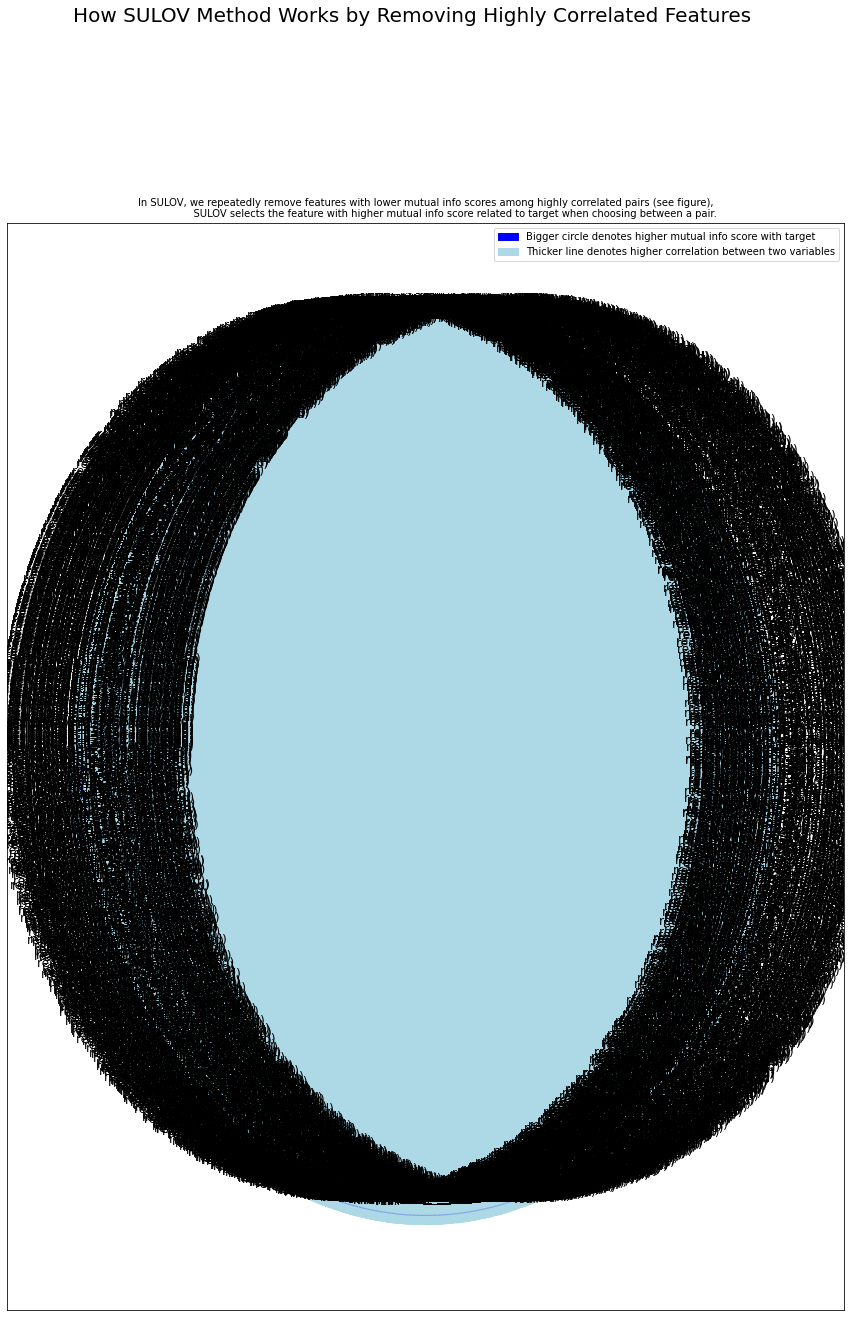

    Adding 0 categorical variables to reduced numeric variables  of 230
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 230 
    Finding Important Features using Boosted Trees algorithm...
        using 230 variables...
        using 184 variables...
        using 138 variables...
        using 92 variables...
        using 46 variables...
Selected 230 important features. Too many to print...
    Time taken (in seconds) = 2701
Returning list of 230 important features and dataframe.


In [13]:
outputs = featurewiz(dataset.iloc[:9999,:], collist, corr_limit=0.9, verbose=1, dask_xgboost_flag=False)

In [14]:
outputs

(['realpowerin_632',
  'realpowerin_622',
  'realpowerin_1315',
  'realpowerin_605',
  'realpowerin_594',
  'realpowerin_1251',
  'reactivepowerin_610',
  'realpowerin_667',
  'reactivepowerin_615',
  'reactivepowerin_599',
  'realpowerin_1336',
  'reactivepowerin_585',
  'realpowerin_1260',
  'realpowerin_1298',
  'reactivepowerin_648',
  'realpowerin_1321',
  'realpowerin_3',
  'realpowerin_575',
  'reactivepowerin_590',
  'reactivepowerin_351',
  'reactivepowerin_628',
  'reactivepowerin_11',
  'reactivepowerin_268',
  'realpowerin_657',
  'realpowerin_759',
  'reactivepowerin_46',
  'reactivepowerin_372',
  'reactivepowerin_641',
  'reactivepowerin_18',
  'reactivepowerin_235',
  'realpowerin_1194',
  'reactivepowerin_1278',
  'reactivepowerin_260',
  'reactivepowerin_199',
  'reactivepowerin_961',
  'realpowerin_1274',
  'reactivepowerin_508',
  'reactivepowerin_173',
  'realpowerin_693',
  'reactivepowerin_705',
  'realpowerin_272',
  'realpowerin_79',
  'reactivepowerin_763',
  

In [16]:
def backup(object, filename):
    with open(filename, 'wb') as f:
        pickle.dump(object, f, pickle.HIGHEST_PROTOCOL)

def reload(persist):
    with open(persist, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
    return data

In [18]:
backup(outputs,"outputs_feature_select.pickle")